In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
data = pd.read_csv("/content/davidson_dataset.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [30]:
data = data.rename(columns={'class': 'label', 'tweet': 'text'})

In [31]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [32]:
data.label.value_counts()

1    19190
2     4163
0     1430
Name: label, dtype: int64

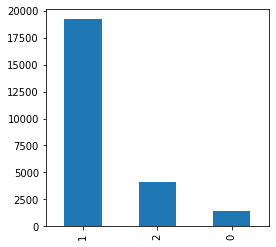

In [33]:
rcParams['figure.figsize'] = 4,4
data.label.value_counts().plot(kind="bar")

In [34]:
tweets = data[data['label']==0]
print(tweets.shape)

tweets_text_len = tweets['text'].str.len()
print("The maximum lenght of string in HATEFUL class is {} words".format(max(tweets_text_len)))
print("The minimum lenght of string in HATEFUL class is {} words".format(min(tweets_text_len)))

(1430, 7)
The maximum lenght of string in HATEFUL class is 254 words
The minimum lenght of string in HATEFUL class is 5 words


In [35]:
norm = data[data['label']==1]
print(norm.shape)

norm_text_len = norm['text'].str.len()
print("The maximum lenght of string in NORMAL class is {} words".format(max(norm_text_len)))
print("The minimum lenght of string in NORMAL class is {} words".format(min(norm_text_len)))

(19190, 7)
The maximum lenght of string in NORMAL class is 754 words
The minimum lenght of string in NORMAL class is 5 words


In [36]:
from statistics import mean
with open('/content/davidson_dataset.csv', 'r', newline='') as f, open('results.csv', 'w', newline='') as output:
    reader = csv.reader(f, skipinitialspace=True)
    headers = next(reader)
    writer = csv.writer(output)
    writer.writerow(headers)
    writer.writerow([mean(map(len, col)) for col in zip(*reader)])

The average length of a comment in the dataset is 85.436065044587 words.


In [37]:
#tokenization = splitting up a larger body of text into smaller lines, words 

def tokenize_and_stop_words(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

tweets['text'] = tweets['text'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


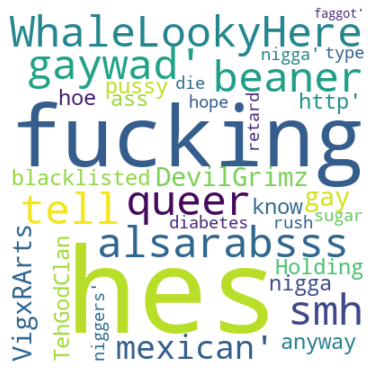

In [38]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 400,
        height = 400,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tweets_text = tweets.text.values
generate_word_cloud(tweets_text)

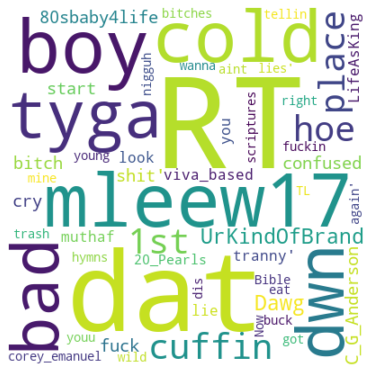

In [39]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 400,
        height = 400,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tweets_text = norm.text.values
generate_word_cloud(tweets_text)

In [40]:
set(data.text)

{'@DerekIsNormal RT @crappyfactsare McRib buns contain a chemical "azodicarbonamide" which is also used to make yoga mats &amp; soles of shoes',
 'Cute ass niggah. http://t.co/h0SQoPTYfX',
 'Gave her that "move it lil nigger" push smh.. http://t.co/EKdSI8pQdD',
 '"@KyraNadiya_: These hoes ain\'t loyal ; no they ain\'t http://t.co/h1UBsVbkGl"\n\nSmfh &amp; wonder why nobody decent wants them',
 'Lol they tricking niccas left n right',
 'dey selling liquor drinks in dis bitch too!! &#128514;&#128514;',
 "@SarahKSilverman Just saw your black NRA skit. It was vile. You're not funny. Was a fan of yours, not anymore. #cunt",
 "@JawShoeeAhhh you're a bitch lol",
 '@EdgarGuillenjr @jo_clark6 @blakeanderson21 your a bitch if you hit a girl',
 'RT @GorgeousLeeiyah: Niggas loose they down bitch for a bitch who down to snitch &#128586;&#128175;',
 'Not my fault yo bitch wanna flip me',
 'RT @Brit_Stratton: Justification of my bitch face. Thanks @zzachbarness. http://t.co/A6giLjeE4x',
 '@BrandNewAn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


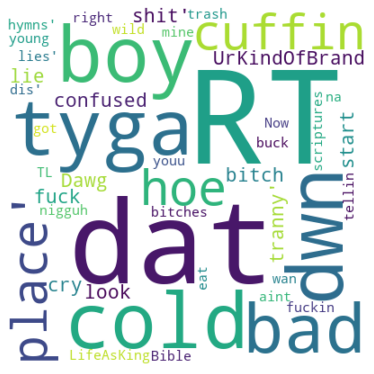

In [41]:
normal = data[data['label']==1]
normal['text'] = normal['text'].apply(tokenize_and_stop_words)

norm_lang = normal['text'].values
generate_word_cloud(norm_lang)

In [42]:
hateful = data[data['label']==0]
hateful['text'] = hateful['text'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


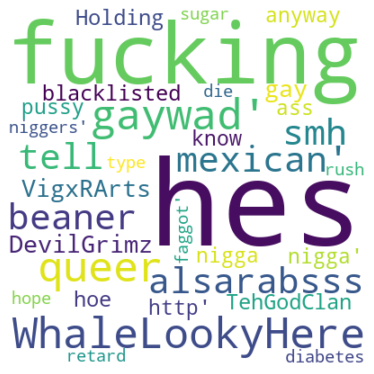

In [43]:
hate_speech = hateful['text'].values
generate_word_cloud(hate_speech)

In [44]:
hateful.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,text
85,85,3,2,1,0,0,WhaleLookyHere queer gaywad
89,90,3,3,0,0,0,alsarabsss hes beaner smh tell hes mexican
110,111,3,3,0,0,0,DevilGrimz VigxRArts fucking gay blacklisted h...
184,186,3,3,0,0,0,MarkRoundtreeJr LMFAOOOO I HATE BLACK PEOPLE h...
202,204,3,2,1,0,0,NoChillPaz At least I nigger http Lmfao


In [45]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [46]:
word = basic_clean(''.join(str(data['text'].tolist())))

In [47]:
bigrams_series = (pd.Series(nltk.ngrams(word, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

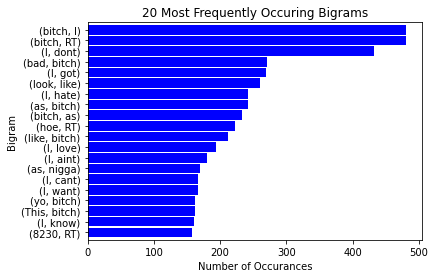

In [48]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')

Text(0.5, 0, 'Number of Occurances')

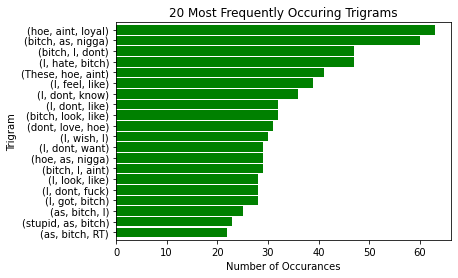

In [49]:
trigrams_series = (pd.Series(nltk.ngrams(word, 3)).value_counts())[:20]
trigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Number of Occurances')

In [50]:
#a basic model
x_train, x_test, y_train, y_test = train_test_split(data['text'], data.label,
shuffle=False, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [51]:
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 90.72%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
print(confusion_matrix(y_test, prediction))

[[  46  155   33]
 [  35 3799   94]
 [   2  141  652]]


In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.55      0.20      0.29       234
           1       0.93      0.97      0.95      3928
           2       0.84      0.82      0.83       795

    accuracy                           0.91      4957
   macro avg       0.77      0.66      0.69      4957
weighted avg       0.90      0.91      0.90      4957



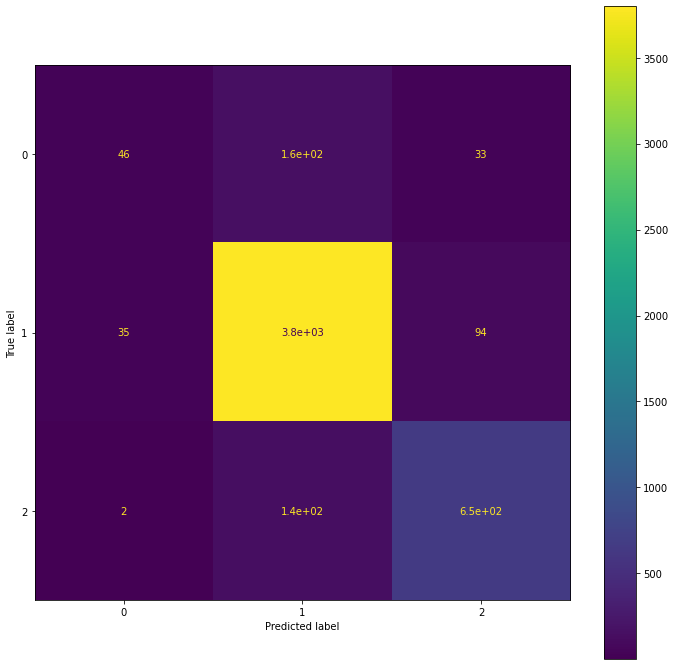

In [54]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(model,x_test,y_test, ax=ax)
plt.show()